In [23]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import random
import math
df = pd.read_csv('Data.csv')
# top20 = df.nlargest(20,['metric_value'])
df = df[df.metric_value > 100]
df = df[df['metric_name'].str.contains('accounts')]
df = df.groupby('metric_name').filter(lambda x: len(x) >= 1000)
count = df['metric_name'].value_counts().head(20) 
print(count)

google.accounts:num_users_2sv_not_enrolled                     1577
google.accounts:num_1day_logins                                1577
google.accounts:num_users                                      1577
google.accounts:num_suspended_users                            1577
google.accounts:num_30day_logins                               1577
google.accounts:num_7day_logins                                1577
google.accounts:num_users_2sv_not_enrolled_and_not_enforced    1577
google.accounts:num_disabled_accounts                          1577
google.accounts:num_users_2sv_not_enforced                     1577
google.accounts:num_authorized_apps                            1542
google.accounts:gplus_photos_used_quota_in_mb                  1490
google.accounts:gmail_used_quota_in_mb                         1490
google.accounts:drive_used_quota_in_mb                         1490
google.accounts:used_quota_in_mb                               1490
google.accounts:num_users_less_secure_apps_acces

In [24]:


df1= df[df.metric_name == 'google.accounts:num_1day_logins']
df1= df1['metric_value']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x047B8DB0>]],
      dtype=object)

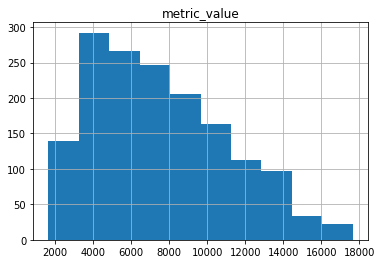

In [26]:
pd.DataFrame(df1).hist()


In [27]:
df1.mean()

7511.603043753963

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x091E5F90>]],
      dtype=object)

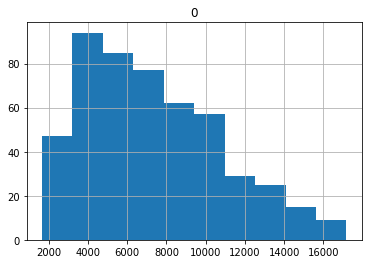

In [28]:
np.random.seed(6)
sample = np.random.choice(a= df1,size=500)            # Sample 1000 values

pd.DataFrame(sample).hist()

In [33]:
print ( sample.mean() )                         

7309.87


In [34]:
print(df1.mean() - sample.mean())

201.7330437539631


In [35]:
np.random.seed(10)

sample_size = 1000
sample = np.random.choice(a= df1, size = sample_size)
sample_mean = sample.mean()

z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*

print("z-critical value:")              # Check the z-critical value
print(z_critical)                        

pop_stdev = df1.std() 

margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("Sample Mean:")
print(sample_mean)

print("Confidence interval:")
print(confidence_interval)

z-critical value:
1.959963984540054
Sample Mean:
7439.583
Confidence interval:
(7221.476370852023, 7657.689629147976)


C:\Users\Henry\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


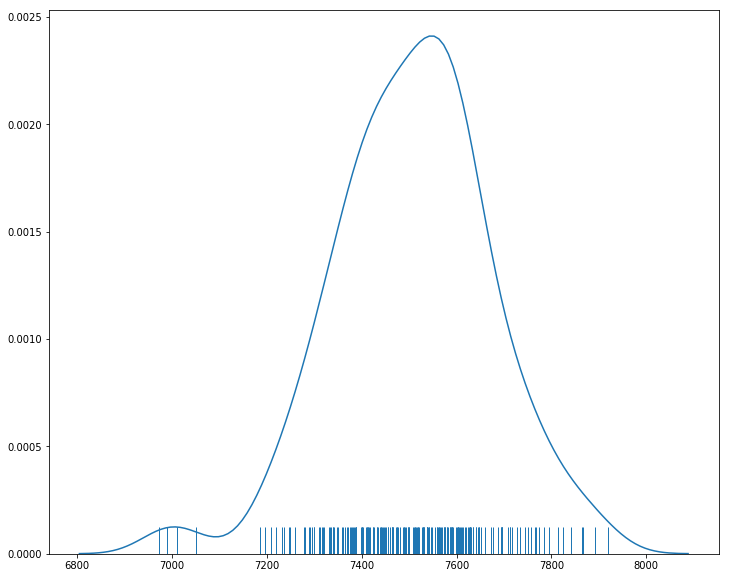

In [36]:
np.random.seed(10)

point_estimates = []         # Make empty list to hold point estimates

for x in range(200):         # Generate 200 samples
    sample = np.random.choice(a= df1, size=500)
    point_estimates.append( sample.mean() )
    
f, ax = plt.subplots(figsize=(12, 10))
sns.distplot( point_estimates, hist=False, rug=True); # Plot sample mean density

C:\Users\Henry\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

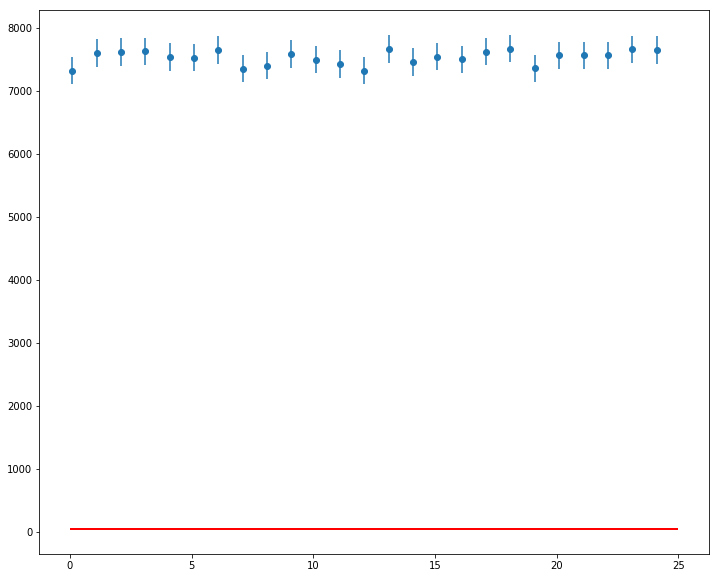

In [37]:

intervals = []
sample_means = []

for sample in range(25):
    sample = np.random.choice(a= df1, size = sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)

    z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*         

    pop_stdev = df1.std()  

    stats.norm.ppf(q = 0.025)

    margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

    confidence_interval = (sample_mean - margin_of_error,
                           sample_mean + margin_of_error)  
    
    intervals.append(confidence_interval)
    plt.figure(figsize=(12,10))

plt.errorbar(x=np.arange(0.1, 25, 1), 
             y=sample_means, 
             yerr=[(top-bot)/2 for top,bot in intervals],
             fmt='o')

plt.hlines(xmin=0, xmax=25,
           y=43.0023, 
           linewidth=2.0,
           color="red")

In [38]:
np.random.seed(10)

sample_size = 25
sample = np.random.choice(a= df1, size = sample_size)
sample_mean = sample.mean()

t_critical = stats.t.ppf(q = 0.975, df=24)  # Get the t-critical value*

print("t-critical value:")                  # Check the t-critical value
print(t_critical)                        

sample_stdev = sample.std()    # Get the sample standard deviation

sigma = sample_stdev/math.sqrt(sample_size)  # Standard deviation estimate
margin_of_error = t_critical * sigma

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("Confidence interval:")
print(confidence_interval)

t-critical value:
2.0638985616280205
Confidence interval:
(5588.076965295933, 8788.963034704067)
